# Case Study:  Linear Regression

### Problem Statement:
1. Design a machine learning model to predict the chance of admit to the IVY league college.
2. Finding out the dominant factors/features in predicting the chance of admit to IVY league college.
3. Finding out the accuracy of regression model.
4. Finding out the correlation between different independent features.
5. How does the median values of chance of admit varies w.r.t university rating feature.
6. How does the median values of chance of admit varies w.r.t. SOP feature.
7. How does the median values of chance of admit varies w.r.t. LOR feature.
8. How does median values of chance of admit varies w.r.t. Research feature.

In [1246]:
#Import Libraries and perform EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [1247]:
warnings.filterwarnings('ignore')

In [1248]:
df = pd.read_csv('train.csv')

In [1249]:
df.shape

(500, 9)

In [1250]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### EDA

In [1251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Observations from df.info()
1. All features are non-null values. So no missing values are present.
2. All feature are numerical
3. Total sample size is 500
4. Number of features are 9

In [1252]:
#check for null/missing values

df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [1253]:
#Check for duplicate values

df.duplicated().sum()

0

In [1254]:
#Check for dataframe statistics

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Observations from df.describe()
1. Mean and median values of all the features seems almost same.
2. So there shoudn't be any significant outliers issue here.

In [1255]:
#Print the number of unique values in all the features

print(df['Serial No.'].nunique())
print(df['GRE Score'].nunique())
print(df['TOEFL Score'].nunique())
print(df['University Rating'].nunique())
print(df['SOP'].nunique())
print(df['LOR '].nunique())
print(df['CGPA'].nunique())
print(df['Research'].nunique())
print(df['Chance of Admit '].nunique())

500
49
29
5
9
9
184
2
61


In [1256]:
#Print values counts for University Rating feature

df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [1257]:
#Print values counts for SOP feature

df['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [1258]:
#Print values counts for LOR feature

df['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

In [1259]:
#Print values counts for Research feature

df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

### Graphical analysis: Univariate and Bivariate

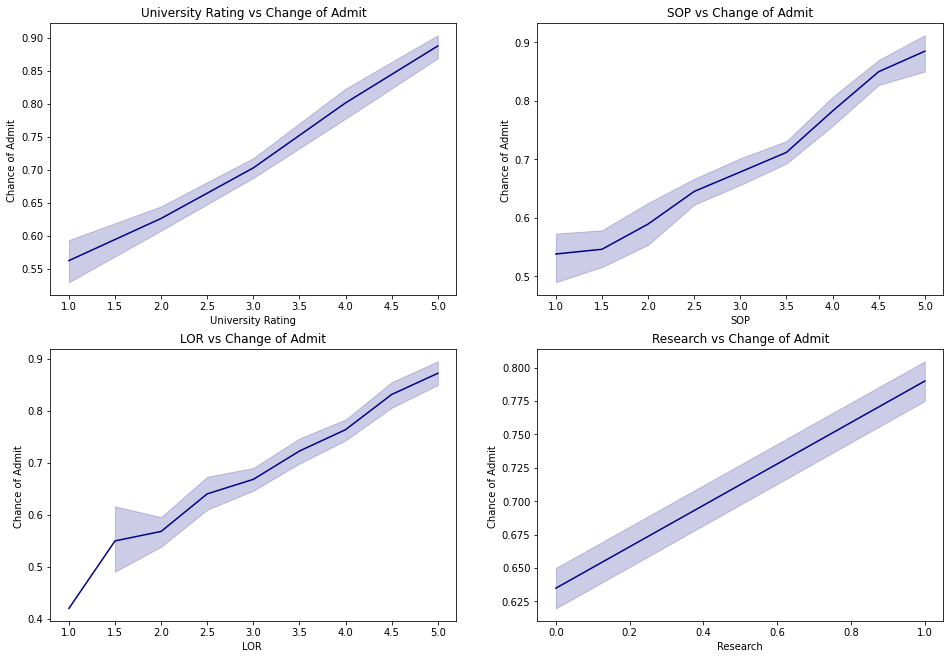

In [1260]:
#Draw lineplots to show how does the Chance of admit varies w.r.t. values of different categorical features

plt.figure(figsize=(16,11))
plt.subplot(2,2,1)
sns.lineplot(df['University Rating'],df['Chance of Admit '],color='darkblue')
plt.title('University Rating vs Change of Admit')
plt.subplot(2,2,2)
sns.lineplot(df['SOP'], df['Chance of Admit '],color='darkblue')
plt.title('SOP vs Change of Admit')
plt.subplot(2,2,3)
sns.lineplot(df['LOR '], df['Chance of Admit '],color='darkblue')
plt.title('LOR vs Change of Admit')
plt.subplot(2,2,4)
sns.lineplot(df['Research'], df['Chance of Admit '],color='darkblue')
plt.title('Research vs Change of Admit')
plt.show()

### Observations from lineplots:
1. For the higher university rating, the chance of admit is higher
2. For the higher SOP rating, the chance of admit is higher
3. For the higher LOR rating, the change of admit is higher
4. Resarchers have higher chance of admit than non-researchers

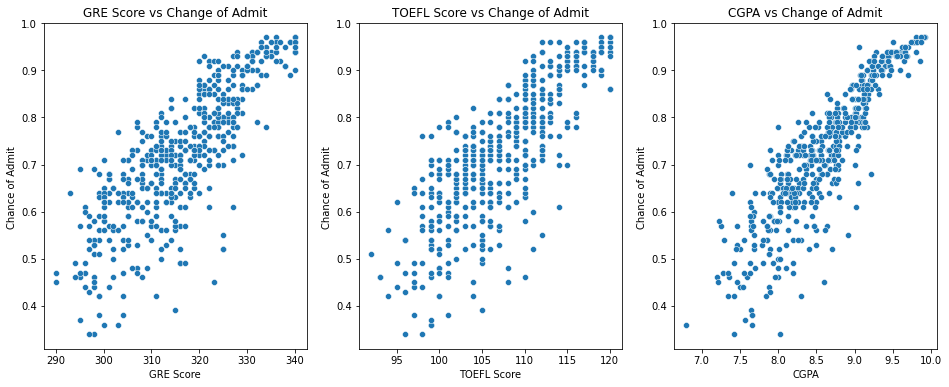

In [1261]:
#Draw scatterplot to show how does the Chance of admit varies w.r.t. values of different 
#continuous features

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.scatterplot(df['GRE Score'],df['Chance of Admit '])
plt.title('GRE Score vs Change of Admit')
plt.subplot(1,3,2)
sns.scatterplot(df['TOEFL Score'], df['Chance of Admit '])
plt.title('TOEFL Score vs Change of Admit')
plt.subplot(1,3,3)
sns.scatterplot(df['CGPA'], df['Chance of Admit '])
plt.title('CGPA vs Change of Admit')
plt.show()

### Observations from scatterplot above:
1. For higher GRE score, the chances of admit are higher
2. For higher TOEFL score, the chances of admit are higher
3. For higher CGPA, the chances of admit are higher

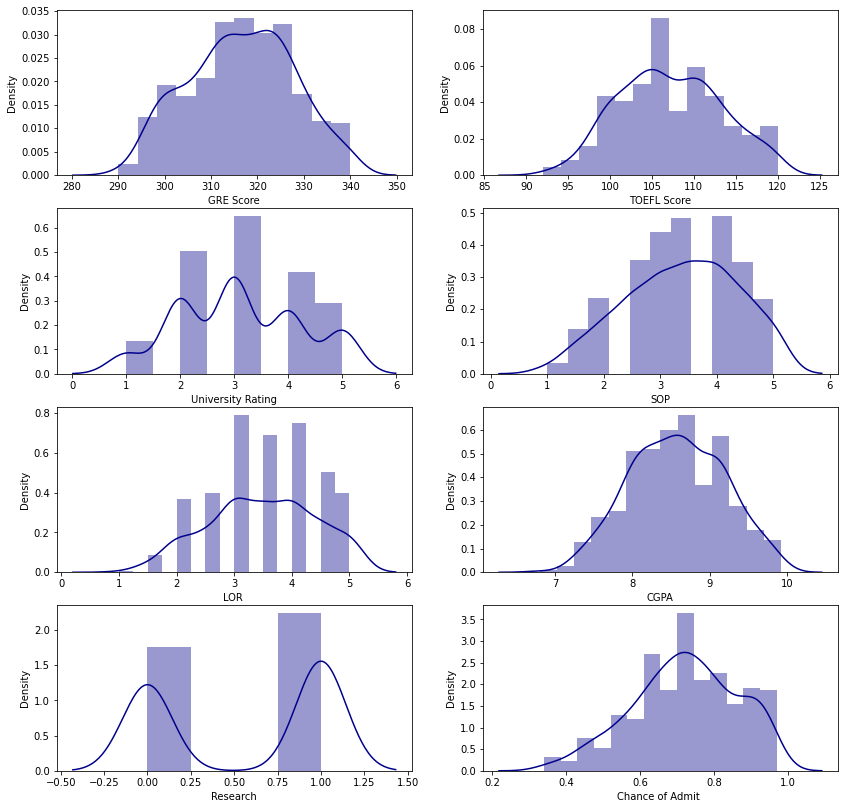

In [1262]:
#Check for distribution of different features

fig,axes = plt.subplots(4,2,figsize=(14,14))
sns.distplot(df['GRE Score'],ax=axes[0,0],color='darkblue')
sns.distplot(df['TOEFL Score'],ax=axes[0,1],color='darkblue')
sns.distplot(df['University Rating'],ax=axes[1,0],color='darkblue')
sns.distplot(df['SOP'],ax=axes[1,1],color='darkblue')
sns.distplot(df['LOR '],ax=axes[2,0],color='darkblue')
sns.distplot(df['CGPA'],ax=axes[2,1],color='darkblue')
sns.distplot(df['Research'],ax=axes[3,0],color='darkblue')
sns.distplot(df['Chance of Admit '],ax=axes[3,1],color='darkblue')
plt.show()

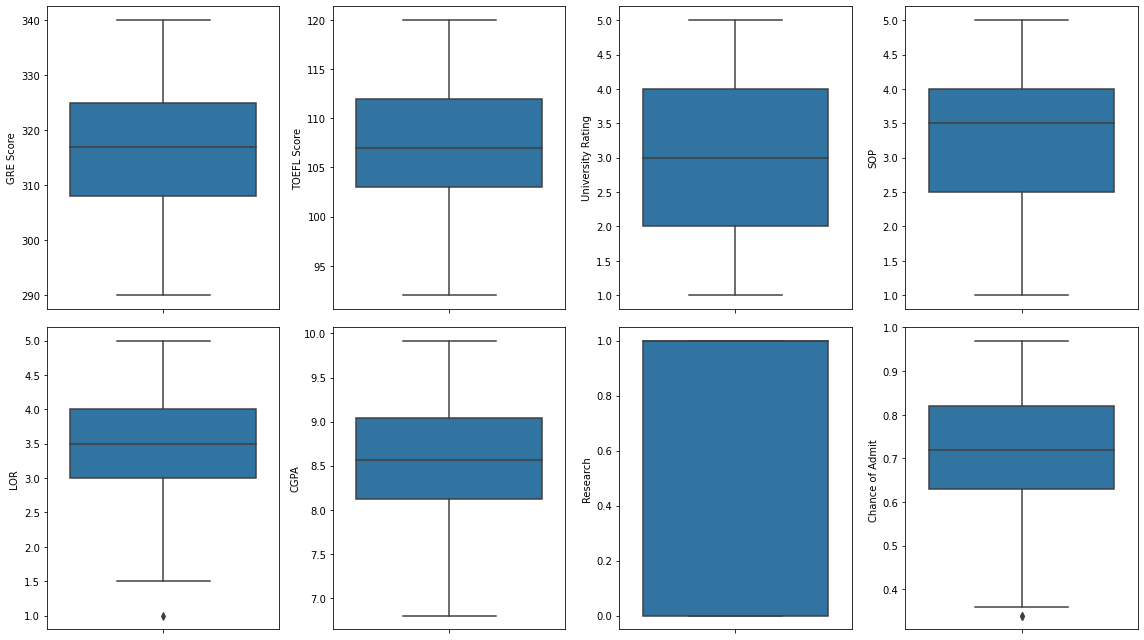

In [1263]:
#Check for outliers

fig,axes = plt.subplots(2,4,figsize=(16,9))
sns.boxplot(y=df['GRE Score'],ax=axes[0,0])
sns.boxplot(y=df['TOEFL Score'],ax=axes[0,1])
sns.boxplot(y=df['University Rating'],ax=axes[0,2])
sns.boxplot(y=df['SOP'],ax=axes[0,3])
sns.boxplot(y=df['LOR '],ax=axes[1,0])
sns.boxplot(y=df['CGPA'],ax=axes[1,1])
sns.boxplot(y=df['Research'],ax=axes[1,2])
sns.boxplot(y=df['Chance of Admit '],ax=axes[1,3])
fig.tight_layout()
plt.show()

### Outlier detection using IQR

In [1264]:
def detect_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    
    outlier = df.loc[(df[col] < lb) | (df[col] > ub)]
    return outlier.shape[0]/df.shape[0]*100

In [1265]:
print(f'Outliers percentages')
print(f"GRE Score         = {detect_outliers(df,'GRE Score')}%")
print(f"TOEFL Score       = {detect_outliers(df,'TOEFL Score')}%")
print(f"University Rating = {detect_outliers(df,'University Rating')}%")
print(f"SOP               = {detect_outliers(df,'SOP')}%")
print(f"LOR               = {detect_outliers(df,'LOR ')}%")
print(f"CGPA              = {detect_outliers(df,'CGPA')}%")
print(f"Research          = {detect_outliers(df,'Research')}%")
print(f"Chance of Admit   = {detect_outliers(df,'Chance of Admit ')}%")

Outliers percentages
GRE Score         = 0.0%
TOEFL Score       = 0.0%
University Rating = 0.0%
SOP               = 0.0%
LOR               = 0.2%
CGPA              = 0.0%
Research          = 0.0%
Chance of Admit   = 0.4%


### Observations from outliers detection:
1. % of outliers in LOR = 0.2%
2. % of outliers in chance of admit = 0.4%

In [1266]:
#Outliers Treatment
def print_outliers(df, col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    print(f'Lower bound: {lb.round(2)}')
    print(f'Upper bound: {ub.round(2)}')
    return df.loc[(df[col] < lb) | (df[col] > ub)]

In [1267]:
print_outliers(df, 'LOR ')

Lower bound: 1.5
Upper bound: 5.5


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,348,299,94,1,1.0,1.0,7.34,0,0.42


In [1268]:
print_outliers(df, 'Chance of Admit ')

Lower bound: 0.35
Upper bound: 1.1


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,93,298,98,2,4.0,3.0,8.03,0,0.34
376,377,297,96,2,2.5,2.0,7.43,0,0.34


### Outlier Treatement:
1. We have replaced the outlier values with their respective lower and upper bound
2. Replaced LOR = 1.0 with lower bound 1.5
3. Replaced Chance of admit = 0.34 with lower bound 0.35

In [1269]:
#Imputing the outlier values
df.loc[(df['LOR ']==1.0),'LOR '] = 1.5
df.loc[(df['Chance of Admit '] == 0.34), 'Chance of Admit '] = 0.35

### Feature engineering

In [1270]:
#Dropping Serial No. column as it won't be an useful feature in model building

df = df.drop(['Serial No.'], axis=1)

In [1271]:
df.shape

(500, 8)

In [1272]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Univariate and Bi-variate analysis w.r.t. dependent feature Chance of Admit

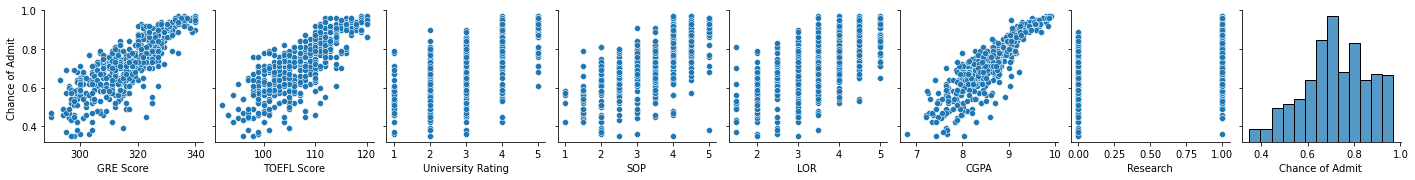

In [1273]:
#Draw pairplot of all independent features with w.r.t to dependent feature

sns.pairplot(data=df, y_vars=['Chance of Admit '],
            x_vars=df.columns)
plt.show()

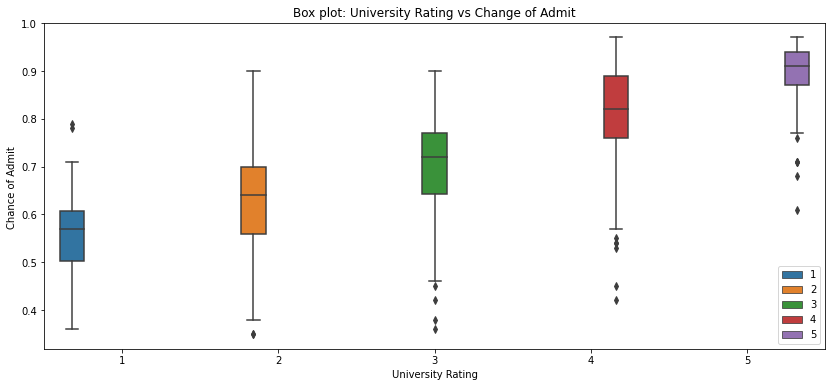

In [1274]:
#Draw box plot for university rating to check how the median changes for chance of admit with ratings

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='University Rating', y='Chance of Admit ', hue='University Rating')
plt.title('Box plot: University Rating vs Change of Admit')
plt.legend(loc='lower right')
plt.show()

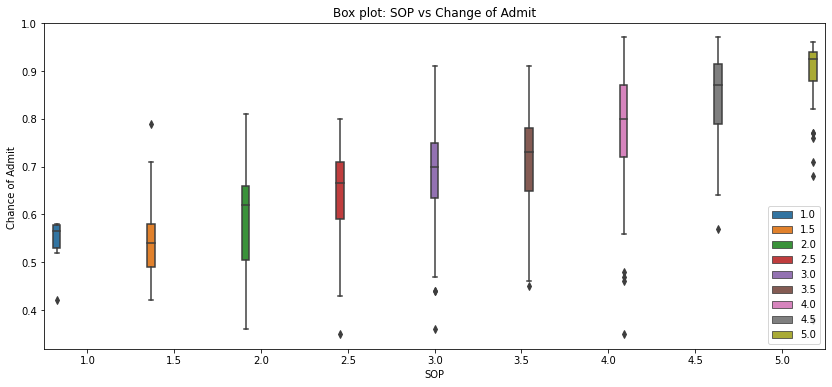

In [1275]:
#Draw box plot for SOP to check how the median changes for chance of admit with ratings

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='SOP', y='Chance of Admit ', hue='SOP')
plt.title('Box plot: SOP vs Change of Admit')
plt.legend(loc='lower right')
plt.show()

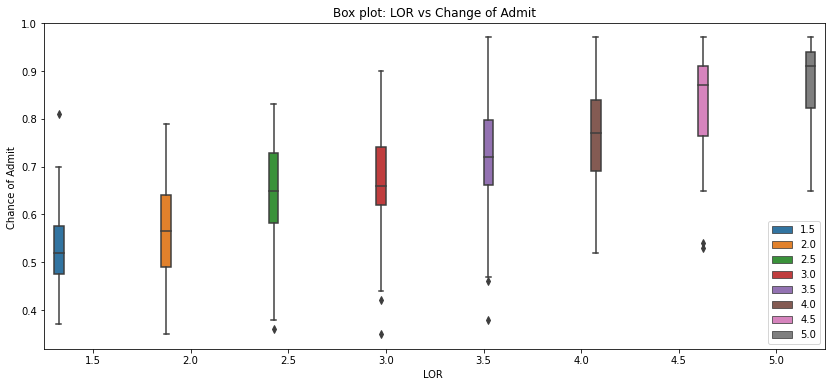

In [1276]:
#Draw box plot for LOR to check how the median changes for chance of admit with ratings

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='LOR ', y='Chance of Admit ', hue='LOR ')
plt.title('Box plot: LOR vs Change of Admit')
plt.legend(loc='lower right')
plt.show()

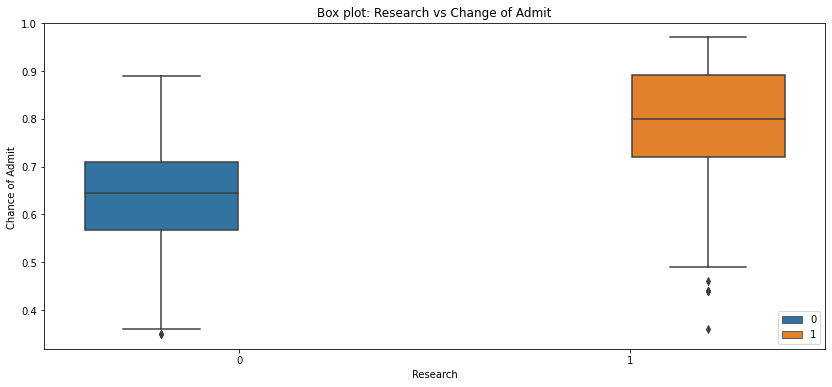

In [1277]:
#Draw box plot for Research to check how the median changes for chance of admit with ratings

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Research', y='Chance of Admit ', hue='Research')
plt.title('Box plot: Research vs Change of Admit')
plt.legend(loc='lower right')
plt.show()

### Correlation

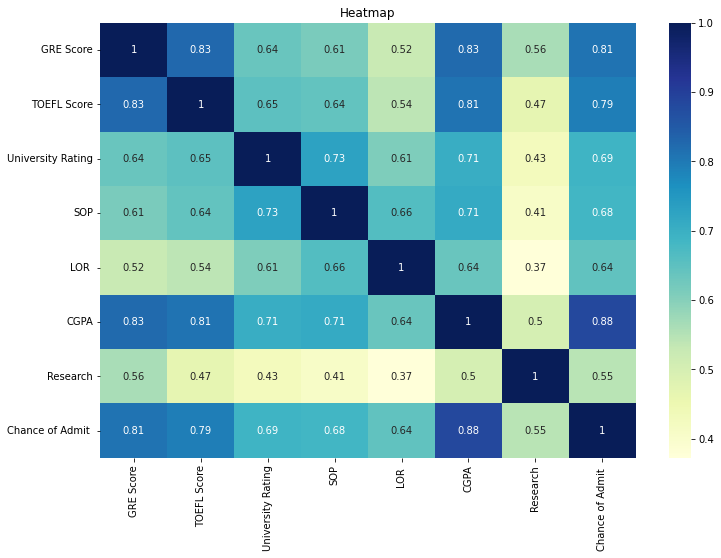

In [1278]:
#Draw correlation heatmap

plt.figure(figsize=(12,8))
df_corr = df.corr()
sns.heatmap(df_corr, cmap='YlGnBu', annot=True)
plt.title('Heatmap')
plt.show()

### Observations from heatmap:
Strong positive correlation exists between below features
1. Chance of Admit - GRE Score
2. Chance of Admit - TOEFL Score
3. Chance of Admit - CGPA
4. CGPA - GRE Score
5. CGPA - TOEFL Score
6. TOEFL Score - GRE Score

### Build ML model

In [1279]:
#Import sklearn libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [1280]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [1281]:
#Prepare data for Linear Regression
#X - Independent features
#y - Dependent feature

X = df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

In [1282]:
#Perform standardization on features

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [1283]:
#Split the data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [1284]:
#Print shape of train and test datasets

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 7) (100, 7) (400,) (100,)


### Linear Regression

In [1285]:
#Linear Regression model
#Print intercepts
#Print coefficients

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(f'Train score: {LR.score(X_train, y_train).round(4)}')
print(f'Test score: {LR.score(X_test, y_test).round(4)}')
coef = list(zip(X.columns,LR.coef_.round(4)))
intercept = LR.intercept_.round(4)
print(f'Intercept: {intercept}')
print(f'Coefficients: ')
for i in range(len(coef)):
    print(coef[i][0],' = ',coef[i][1])

Train score: 0.8216
Test score: 0.8188
Intercept: 0.7229
Coefficients: 
GRE Score  =  0.0274
TOEFL Score  =  0.0181
University Rating  =  0.0029
SOP  =  0.0019
LOR   =  0.0158
CGPA  =  0.068
Research  =  0.0119


### Ridge Regression

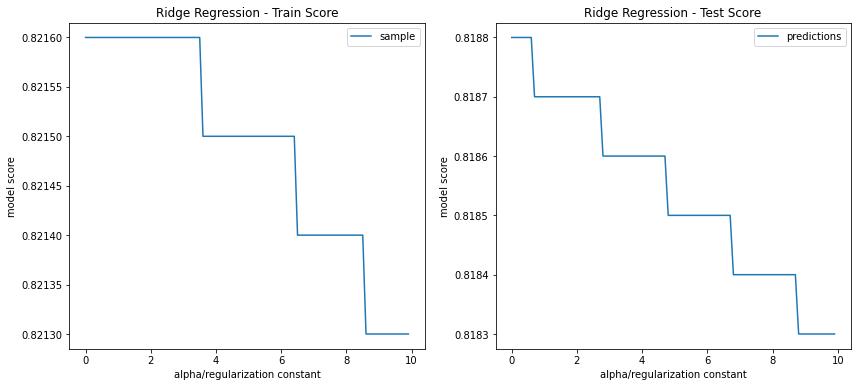

Best alpha: 0.0
Max Train score: 0.8216
Max Test score: 0.8188


In [1286]:
train_score = []
test_score = []
for a in np.arange(0,10,0.1):
    clf = Ridge(alpha=a)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train).round(4))
    test_score.append(clf.score(X_test, y_test).round(4))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(np.arange(0,10,0.1), train_score, label='sample')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Ridge Regression - Train Score')
plt.subplot(1,2,2)
plt.plot(np.arange(0,10,0.1), test_score, label='predictions')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Ridge Regression - Test Score')
plt.show()

print(f'Best alpha: {np.arange(0,10,0.1)[np.argmax(test_score)]}')
print(f'Max Train score: {train_score[np.argmax(train_score)]}')
print(f'Max Test score: {test_score[np.argmax(test_score)]}')

### Lasso Regression

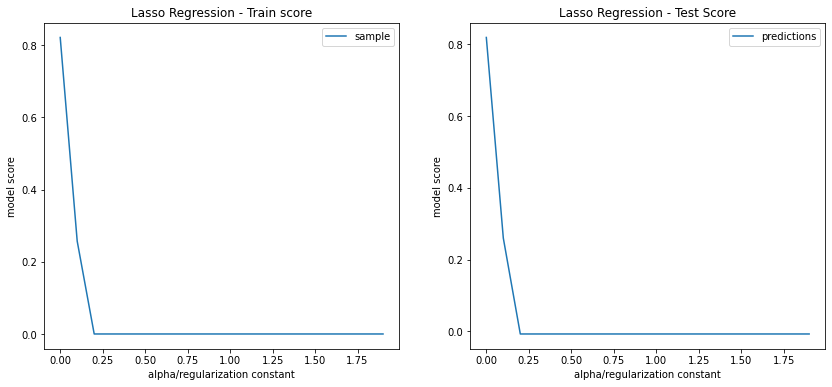

Best alpha: 0.0
Max Train score: 0.8216
Max Test score: 0.8188


In [1287]:
train_score = []
test_score = []
for a in np.arange(0,2,0.1):
    clf = Lasso(alpha=a)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train).round(4))
    test_score.append(clf.score(X_test, y_test).round(4))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(np.arange(0,2,0.1), train_score, label='sample')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Lasso Regression - Train score')
plt.subplot(1,2,2)
plt.plot(np.arange(0,2,0.1), test_score, label='predictions')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Lasso Regression - Test Score')
plt.show()

print(f'Best alpha: {np.arange(0,2,0.1)[np.argmax(test_score)]}')
print(f'Max Train score: {train_score[np.argmax(train_score)]}')
print(f'Max Test score: {test_score[np.argmax(test_score)]}')

### Assumptions of Linear Regression

#### Multicollinearity check by VIF score:

In [1288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1289]:
def vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = vif['VIF'].round(4)
    vif = vif.sort_values(['VIF'], ascending=False)
    return vif

In [1290]:
vif(X)

,Features,VIF
0,GRE Score,1307.5835
1,TOEFL Score,1215.9651
5,CGPA,950.7785
3,SOP,35.2397
4,LOR,31.0138
2,University Rating,20.9354
6,Research,2.8694


In [1291]:
#There are multiple features with VIF score > 5. 
#Lets drop the features one by one and re-check the VIF scores

In [1292]:
#Dropping GRE Score and re-check VIF for all other features

vif(X.drop(['GRE Score'], axis=1))

,Features,VIF
4,CGPA,729.0422
0,TOEFL Score,639.7658
2,SOP,33.6976
3,LOR,30.7441
1,University Rating,19.8836
5,Research,2.8632


In [1293]:
#Dropping CGPA and re-check VIF for all other features

vif(X.drop(['GRE Score','CGPA'],axis=1))

,Features,VIF
2,SOP,33.2372
3,LOR,29.6292
0,TOEFL Score,22.1218
1,University Rating,19.7469
4,Research,2.8494


In [1294]:
#Dropping SOP and re-check VIF for remaining features

vif(X.drop(['GRE Score','CGPA','SOP'],axis=1))

,Features,VIF
2,LOR,25.8131
0,TOEFL Score,19.9380
1,University Rating,14.9417
3,Research,2.8242


In [1295]:
#Dropping LOR and re-check VIF for remaining features

vif(X.drop(['GRE Score','CGPA','SOP','LOR '],axis=1))

,Features,VIF
1,University Rating,11.8401
0,TOEFL Score,10.2588
2,Research,2.7808


In [1296]:
#Dropping Univerity Rating and re-check VIF for remaining features

vif(X.drop(['GRE Score','CGPA','SOP','LOR ','University Rating'],axis=1))

,Features,VIF
0,TOEFL Score,2.408
1,Research,2.408


In [1297]:
#No more feature dropping as VIF are all < 5

In [1298]:
#After doing multiple trial and errors we found that
#Train test score is highest on dropping of GRE Score and TOEFL Score

X_new = X.drop(['GRE Score','TOEFL Score'],axis=1)

In [1299]:
X_new.head()

,University Rating,SOP,LOR,CGPA,Research
0,4,4.5,4.5,9.65,1
1,4,4.0,4.5,8.87,1
2,3,3.0,3.5,8.00,1
3,3,3.5,2.5,8.67,1
4,2,2.0,3.0,8.21,0


#### Linear Regression after removing strong multicollinear features

In [1300]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(f'Train score: {LR.score(X_train, y_train).round(4)}')
print(f'Test score:{LR.score(X_test, y_test).round(4)}')
coef = list(zip(X_new.columns,LR.coef_.round(4)))
intercept = LR.intercept_.round(4)
print(f'Intercept: {intercept}')
print(f'Coefficients: ')
for i in range(len(coef)):
    print(coef[i][0],' = ',coef[i][1])

Train score: 0.7993
Test score:0.8307
Intercept: -0.7652
Coefficients: 
University Rating  =  0.007
SOP  =  0.0045
LOR   =  0.0147
CGPA  =  0.1608
Research  =  0.0382


#### Residual Mean Check

In [1301]:
y_test.shape, y_pred.shape

((100,), (100,))

In [1302]:
residuals = y_pred - y_test
print(f'The mean of residuals is nearly zero')
print(f'Residual mean: {np.mean(residuals).round(4)}')

The mean of residuals is nearly zero
Residual mean: 0.0101


#### Linearity of variables (no pattern in the residual plot) 

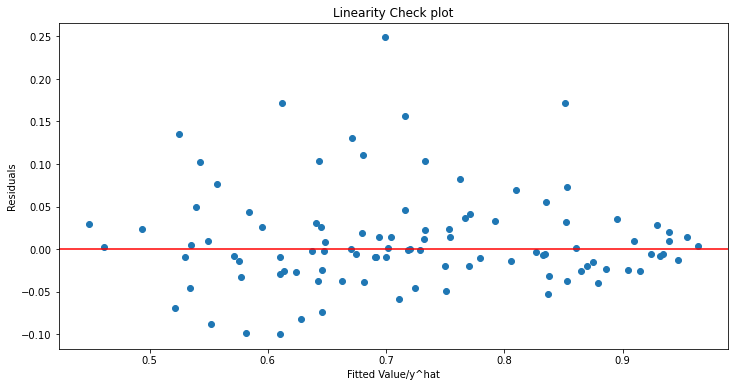

In above plot, Residuals are randomly scattered around zero for the entire range of fitted values


In [1303]:
plt.figure(figsize=(12,6))
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Value/y^hat')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title('Linearity Check plot')
plt.show()
print(f'In above plot, Residuals are randomly scattered around zero for the entire range of fitted values')

#### Test for Homoscedasticity

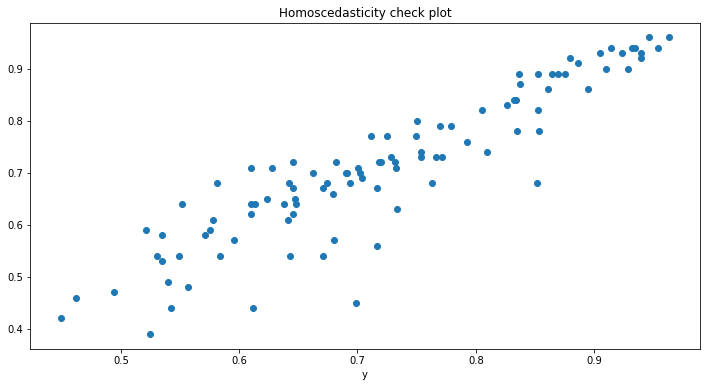

Homoscedasticity test passes in above graph as the variance is constant across line of regression


In [1304]:
plt.figure(figsize=(12,6))
plt.scatter(y_pred,y_test)
plt.xlabel('y_hat')
plt.xlabel('y')
plt.title('Homoscedasticity check plot')
plt.show()
print('Homoscedasticity test passes in above graph as the variance is constant across line of regression')

#### Normality of residuals

In [1305]:
from statsmodels.api import qqplot

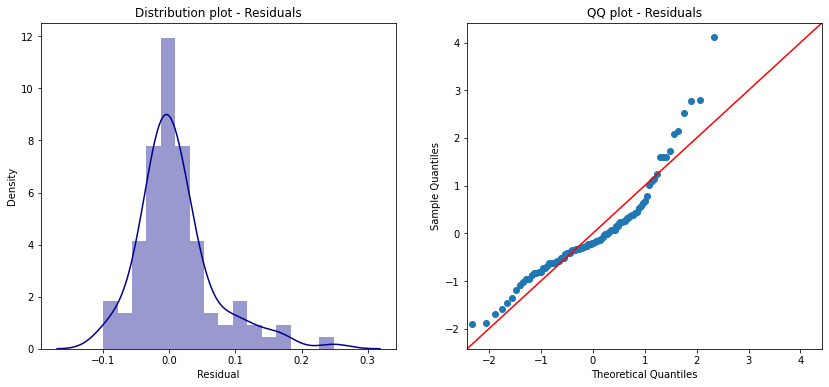

From above plot we can see that the residuals are nearly normally distributed


In [1306]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(residuals,ax=axes[0],color='darkblue')
plt.xlabel('Residual')
plt.title('Distribution plot - Residuals')
plt.subplot(1,2,2)
qqplot(residuals,fit=True,line='45',ax=axes[1])
plt.title('QQ plot - Residuals')
plt.show()
print('From above plot we can see that the residuals are nearly normally distributed')

### Model Performance Evaluation:

In [1307]:
#Import metrics from sklearn

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1308]:
print(f'MAE: {mean_absolute_error(y_test,y_pred).round(4)}')
print(f'MSE: {mean_squared_error(y_test, y_pred).round(4)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)).round(4)}')
print(f'R2: {r2_score(y_test, y_pred).round(4)}')
n=100
k=6
r2 = r2_score(y_test, y_pred)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(f'Adjusted R2: {adj_r2_score.round(4)}')
print()
print(f'The R2 score is 0.83 on test dataset. There is need to improve the model here.')

MAE: 0.0394
MSE: 0.0035
RMSE: 0.0588
R2: 0.8307
Adjusted R2: 0.8197

The R2 score is 0.83 on test dataset. There is need to improve the model here.


### Try polynomial Regression

In [1309]:
#Import polynomial features and pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [1310]:
degrees=10
train_score = []
test_score = []

for degree in range(degrees):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train,y_train)
    train_score.append(polyreg_scaled.score(X_train, y_train))
    test_score.append(polyreg_scaled.score(X_test, y_test))

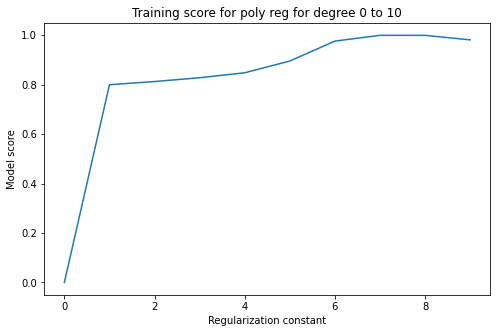

Best degree on train: 8
Best score on train: 0.9989564537448536


In [1311]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(10),train_score)
plt.xlabel('Regularization constant')
plt.ylabel('Model score')
plt.title('Training score for poly reg for degree 0 to 10')
plt.show()
print(f'Best degree on train: {np.argmax(train_score)}')
print(f'Best score on train: {train_score[np.argmax(train_score)]}')

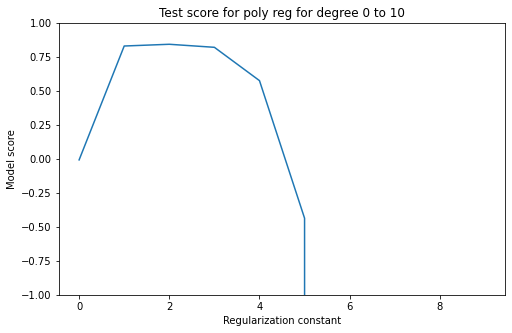

Best degree on test: 2
Best score on test: 0.812257135974225


In [1312]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(10),test_score)
plt.xlabel('Regularization constant')
plt.ylabel('Model score')
plt.ylim(-1,1)
plt.title('Test score for poly reg for degree 0 to 10')
plt.show()
print(f'Best degree on test: {np.argmax(test_score)}')
print(f'Best score on test: {train_score[np.argmax(test_score)]}')

### Observations from polynomial regression
1. We can see that the highest score attained is for the degree = 2
2. and the highest score is 0.81

### Actionable Insights and Recommendations